# Visualization of images with multi digits of size 28x28 randomly placed on a canvas of size 112x112

In [168]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [170]:
from src.load_data import load_mnist, sample_uniformly_imgs #, load_imagenet
from src.utils import downsample_img, crop_digit, get_bottom_right_corner_to_match_shapes
from src.create_data import overlay_small_img_on_large_img_at_random_position

In [171]:
import importlib
import src
importlib.reload(src.create_data)
from src.create_data import overlay_small_img_on_large_img_at_random_position

In [172]:
seed = 4
n_sampled_digits = 14

mnist_dataset_train, mnist_dataset_test = load_mnist()

sampled_digit_images = sample_uniformly_imgs(
    mnist_dataset_train, n_sampled_digits, seed)

In [173]:
canvas_height = 112
canvas_width = 112
canvas = np.zeros((canvas_height, canvas_width))

## Cropping out the background

In [174]:
cropped_sampled_digit_images = []
for sampled_digit_img in sampled_digit_images:
    cropped_sampled_digit_images.append(crop_digit(sampled_digit_img, plot=False))

In [175]:
# TODO: should we also take into account rotation of digits?
###  The paper doesn't seem to apply it

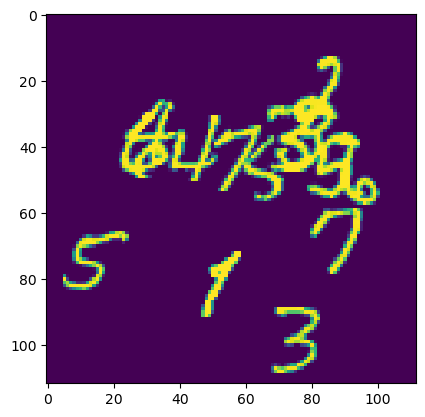

In [176]:
for cropped_sampled_digit_img in cropped_sampled_digit_images:
    overlay_small_img_on_large_img_at_random_position(
        canvas, cropped_sampled_digit_img, is_large_img_grayscale=True)

plt.imshow(canvas)
plt.show()